In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

**Relatively small data**

In [ ]:
m = 10 # number of features
n = 1000 # number of instances in dataset

In [ ]:
data = np.random.normal(0, 1, (n, m))

In [ ]:
b = np.random.normal(0, 1)
w = np.random.normal(0, 1, m)

In [ ]:
# Here we predefine our label generator

def bayes_model(x, w, b):
    """
    Input: feature x
    Output: probabilty p to be positive
    """
    return 1/(1+np.exp(-(np.dot(x, w) + b)))

(array([294.,  60.,  49.,  43.,  42.,  41.,  54.,  58.,  67., 292.]),
 array([2.18259974e-05, 1.00019074e-01, 2.00016321e-01, 3.00013569e-01,
        4.00010816e-01, 5.00008064e-01, 6.00005311e-01, 7.00002559e-01,
        7.99999806e-01, 8.99997054e-01, 9.99994301e-01]),
 <a list of 10 Patch objects>)

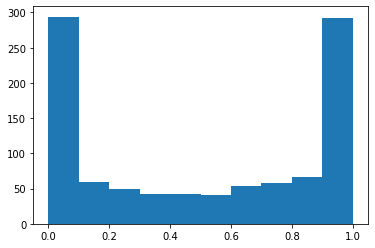

In [ ]:
p = bayes_model(data, w, b) # now we have probabilities of each instance
# It is better to have symmetric histogram (same number of instances > 0.5 and < 0.5)
# in order to have balanced dataset
plt.hist(p)

Here we can generate labels for particular random seed:

In [ ]:
y = np.random.binomial(1, p)
data.shape, y.shape

((1000, 10), (1000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     data, y, test_size=0.33, random_state=77)

In [ ]:
lr = LogisticRegression()

We knew the ideal weights of LR model:

In [ ]:
w, b

(array([ 1.52515703, -1.20022981, -0.55874169, -1.25594007, -0.25286215,
         0.86484664,  3.02971869,  0.51384135, -0.121949  ,  0.08365329]),
 0.16334935924074678)

In [ ]:
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

In [ ]:
score = lr.score(X_test, y_test)
print(score)

0.8818181818181818


**Automated hyperparameter tuning for LR**

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X_train,y_train)

In [ ]:
print (f'Accuracy - : {best_clf.score(X_test, y_test):}')

Accuracy - : 0.8848484848484849


**Manual hyperparameter tuning for LR**

In [ ]:
from time import time
from sklearn.metrics import accuracy_score

In [ ]:
def evaluate(X_tr, Y_tr, X_val, Y_val, params):
    model = LogisticRegression()
    #We should use set_params to pass parameters to model object.
    model.set_params(**params)
    
    start=time()
    model.fit(X_tr,Y_tr)
    exec_time = time() - start
    
    Y_pred = model.predict(X_val)
    acc = accuracy_score(Y_val,Y_pred) * 100.0
    return acc, exec_time

In [ ]:
C=0.001
iterations = 1000
results = np.zeros((iterations, 5))

for i in range(0,iterations):    
    model_params = {'C':C,'random_state':1}
    acc_val,time_val = evaluate(X_train, y_train, X_test, y_test, model_params)
    acc_tr,time_tr = evaluate(X_train, y_train, X_train, y_train, model_params)
    results[i] = i+1, C, acc_tr, acc_val, time_val
    C+=0.005

res_df = pd.DataFrame(  data=results[0:,0:], 
                        index=results[0:,0],
                        columns=['Sl','C','Train_acc','Val_acc','Build_time'])
res_df['Sl'] = res_df['Sl'].astype(np.uint16)
res_df.head()


,Sl,C,Train_acc,Val_acc,Build_time
1.0,1,0.001,77.761194,73.333333,0.003977
2.0,2,0.006,86.268657,87.272727,0.004561
3.0,3,0.011,86.716418,87.272727,0.003087
4.0,4,0.016,86.865672,86.969697,0.003844
5.0,5,0.021,86.716418,86.969697,0.003019


In [ ]:
res_df

,Sl,C,Train_acc,Val_acc,Build_time
1.0,1,0.001,77.761194,73.333333,0.003977
2.0,2,0.006,86.268657,87.272727,0.004561
3.0,3,0.011,86.716418,87.272727,0.003087
4.0,4,0.016,86.865672,86.969697,0.003844
5.0,5,0.021,86.716418,86.969697,0.003019
...,...,...,...,...,...
996.0,996,4.976,87.014925,88.181818,0.004034
997.0,997,4.981,87.014925,88.181818,0.003875
998.0,998,4.986,87.014925,88.181818,0.003854
999.0,999,4.991,87.014925,88.181818,0.005348


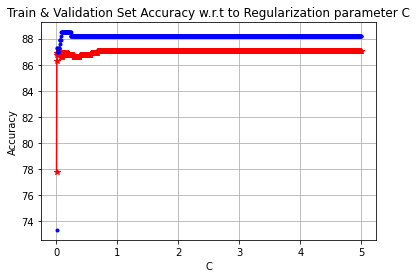

In [ ]:
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Train & Validation Set Accuracy w.r.t to Regularization parameter C')
plt.grid(True)
plt.plot(res_df['C'], res_df['Train_acc'] , 'r*-') # plotting train_acc  
plt.plot(res_df['C'], res_df['Val_acc'] , 'b.') # plotting val_acc

In [ ]:
#tol=1e-6
tol=1e-10
#iterations = 50
iterations = 37
results = np.zeros((iterations, 5))

for i in range(0,iterations):    
    model_params = {'tol':tol,'random_state':1}
    acc_val,time_val = evaluate(X_train, y_train, X_test, y_test, model_params)
    acc_tr,time_tr = evaluate(X_train, y_train, X_train, y_train, model_params)
    results[i] = i+1, tol, acc_tr, acc_val, time_val
    #tol*=5
    tol*=2
    #print(tol)

res_df_tol = pd.DataFrame(  data=results[0:,0:], 
                        index=results[0:,0],
                        columns=['Sl','tol','Train_acc','Val_acc','Build_time'])
res_df_tol['Sl'] = res_df['Sl'].astype(np.uint16)
res_df_tol.head()

,Sl,tol,Train_acc,Val_acc,Build_time
1.0,1,1.000000e-10,87.014925,88.181818,0.004477
2.0,2,2.000000e-10,87.014925,88.181818,0.003837
3.0,3,4.000000e-10,87.014925,88.181818,0.003862
4.0,4,8.000000e-10,87.014925,88.181818,0.004720
5.0,5,1.600000e-09,87.014925,88.181818,0.004087


In [ ]:
#Variation of C wrt to the Solver

C=0.001
iterations = 1000

# There are 5 solvers. For each, we need to see their accuracy on train & validation sets plus their build time.
# Additionaly, first two columns are Sl & C. Hence, a total of (5*3) + 2 = 17 columns required.
results = np.zeros((iterations, 17))
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

for i in range(0,iterations):    
    model_params = {'C':C,'random_state':1}
    results[i][0:2] = i+1, C
    
    j = 2 #internal counter for iterating over each of the solver's results values
    for solver in solver_list:
        model_params.update({'solver': solver})
        acc_val,time_val = evaluate(X_train, y_train, X_test, y_test, model_params)
        acc_tr,time_tr = evaluate(X_train, y_train, X_train, y_train, model_params)
        results[i][j:j+3] = acc_tr, acc_val, time_val
        j+=3
        
    C+=0.005

columns = ['Sl','C']
for solver in solver_list:
    columns.append('Train_acc_'+solver)
    columns.append('Val_acc_'+solver)
    columns.append('Build_time_'+solver)

res_df_solver_C = pd.DataFrame( data=results[0:,0:], 
                                  index=results[0:,0],
                                  columns=columns)
res_df_solver_C['Sl'] = res_df_solver_C['Sl'].astype(np.uint16)
res_df_solver_C.head()


,Sl,C,Train_acc_liblinear,Val_acc_liblinear,Build_time_liblinear,Train_acc_newton-cg,Val_acc_newton-cg,Build_time_newton-cg,Train_acc_lbfgs,Val_acc_lbfgs,Build_time_lbfgs,Train_acc_sag,Val_acc_sag,Build_time_sag,Train_acc_saga,Val_acc_saga,Build_time_saga
1.0,1,0.001,85.820896,86.969697,0.002791,77.761194,73.333333,0.005059,77.761194,73.333333,0.003447,77.761194,73.333333,0.003913,77.761194,73.333333,0.003539
2.0,2,0.006,85.970149,86.969697,0.001452,86.268657,87.272727,0.006811,86.268657,87.272727,0.003350,86.268657,87.272727,0.003152,86.268657,87.272727,0.003484
3.0,3,0.011,86.119403,86.969697,0.001857,86.716418,87.272727,0.006360,86.716418,87.272727,0.004397,86.716418,87.272727,0.004029,86.716418,87.272727,0.003132
4.0,4,0.016,86.268657,86.969697,0.001908,86.865672,86.969697,0.007048,86.865672,86.969697,0.003523,86.865672,86.969697,0.004281,86.865672,86.969697,0.003224
5.0,5,0.021,86.119403,86.969697,0.001823,86.716418,86.969697,0.006833,86.716418,86.969697,0.003455,86.716418,86.969697,0.004552,86.716418,86.969697,0.003452


In [ ]:
res_df_solver_C

,Sl,C,Train_acc_liblinear,Val_acc_liblinear,Build_time_liblinear,Train_acc_newton-cg,Val_acc_newton-cg,Build_time_newton-cg,Train_acc_lbfgs,Val_acc_lbfgs,Build_time_lbfgs,Train_acc_sag,Val_acc_sag,Build_time_sag,Train_acc_saga,Val_acc_saga,Build_time_saga
1.0,1,0.001,85.820896,86.969697,0.002791,77.761194,73.333333,0.005059,77.761194,73.333333,0.003447,77.761194,73.333333,0.003913,77.761194,73.333333,0.003539
2.0,2,0.006,85.970149,86.969697,0.001452,86.268657,87.272727,0.006811,86.268657,87.272727,0.003350,86.268657,87.272727,0.003152,86.268657,87.272727,0.003484
3.0,3,0.011,86.119403,86.969697,0.001857,86.716418,87.272727,0.006360,86.716418,87.272727,0.004397,86.716418,87.272727,0.004029,86.716418,87.272727,0.003132
4.0,4,0.016,86.268657,86.969697,0.001908,86.865672,86.969697,0.007048,86.865672,86.969697,0.003523,86.865672,86.969697,0.004281,86.865672,86.969697,0.003224
5.0,5,0.021,86.119403,86.969697,0.001823,86.716418,86.969697,0.006833,86.716418,86.969697,0.003455,86.716418,86.969697,0.004552,86.716418,86.969697,0.003452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996.0,996,4.976,87.014925,88.181818,0.001703,87.014925,88.181818,0.007423,87.014925,88.181818,0.004100,87.014925,88.181818,0.004522,87.014925,88.181818,0.003569
997.0,997,4.981,87.014925,88.181818,0.001710,87.014925,88.181818,0.007799,87.014925,88.181818,0.004610,87.014925,88.181818,0.005123,87.014925,88.181818,0.003806
998.0,998,4.986,87.014925,88.181818,0.001826,87.014925,88.181818,0.007475,87.014925,88.181818,0.004061,87.014925,88.181818,0.004497,87.014925,88.181818,0.004061
999.0,999,4.991,87.014925,88.181818,0.001900,87.014925,88.181818,0.009103,87.014925,88.181818,0.003974,87.014925,88.181818,0.005406,87.014925,88.181818,0.003803


**Relatively big data**

In [ ]:
k = 20 # number of features
l = 10000 # number of instances in dataset
newdata = np.random.normal(0, 1, (l, k))

(array([3506.,  594.,  391.,  326.,  282.,  300.,  316.,  388.,  580.,
        3317.]),
 array([8.61118588e-10, 1.00000001e-01, 2.00000000e-01, 3.00000000e-01,
        3.99999999e-01, 4.99999999e-01, 5.99999999e-01, 6.99999998e-01,
        7.99999998e-01, 8.99999998e-01, 9.99999997e-01]),
 <a list of 10 Patch objects>)

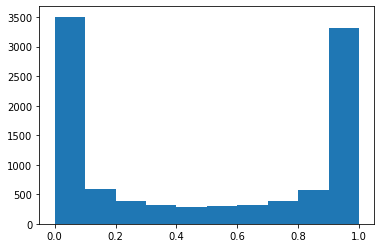

In [ ]:
b = np.random.normal(0, 1)
w = np.random.normal(0, 1, k)

# Here we predefine our label generator

def bayes_model(x, w, b):
    """
    Input: feature x
    Output: probabilty p to be positive
    """
    return 1/(1+np.exp(-(np.dot(x, w) + b)))

p = bayes_model(newdata, w, b) # now we have probabilities of each instance
# It is better to have symmetric histogram (same number of instances > 0.5 and < 0.5)
# in order to have balanced dataset
plt.hist(p)

In [ ]:
target = np.random.binomial(1, p)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     newdata, target, test_size=0.33, random_state=77)

In [ ]:
def evaluate(X_tr, Y_tr, X_val, Y_val, params):
    model = LogisticRegression()
    #We should use set_params to pass parameters to model object.
    model.set_params(**params)
    
    start=time()
    model.fit(X_tr,Y_tr)
    exec_time = time() - start
    
    Y_pred = model.predict(X_val)
    acc = accuracy_score(Y_val,Y_pred) * 100.0
    return acc, exec_time

In [ ]:
C=0.001
iterations = 1000
results = np.zeros((iterations, 5))

for i in range(0,iterations):    
    model_params = {'C':C,'random_state':1}
    acc_val,time_val = evaluate(X_train, y_train, X_test, y_test, model_params)
    acc_tr,time_tr = evaluate(X_train, y_train, X_train, y_train, model_params)
    results[i] = i+1, C, acc_tr, acc_val, time_val
    C+=0.005

res_df = pd.DataFrame(  data=results[0:,0:], 
                        index=results[0:,0],
                        columns=['Sl','C','Train_acc','Val_acc','Build_time'])
res_df['Sl'] = res_df['Sl'].astype(np.uint16)
res_df.head()

,Sl,C,Train_acc,Val_acc,Build_time
1.0,1,0.001,89.940299,90.000000,0.020243
2.0,2,0.006,90.000000,90.000000,0.023894
3.0,3,0.011,90.029851,89.939394,0.023087
4.0,4,0.016,90.000000,90.000000,0.015033
5.0,5,0.021,90.000000,89.969697,0.028266


In [ ]:
res_df

,Sl,C,Train_acc,Val_acc,Build_time
1.0,1,0.001,89.940299,90.000000,0.020243
2.0,2,0.006,90.000000,90.000000,0.023894
3.0,3,0.011,90.029851,89.939394,0.023087
4.0,4,0.016,90.000000,90.000000,0.015033
5.0,5,0.021,90.000000,89.969697,0.028266
...,...,...,...,...,...
996.0,996,4.976,90.089552,90.030303,0.019288
997.0,997,4.981,90.089552,90.030303,0.019595
998.0,998,4.986,90.089552,90.030303,0.019161
999.0,999,4.991,90.089552,90.030303,0.019998


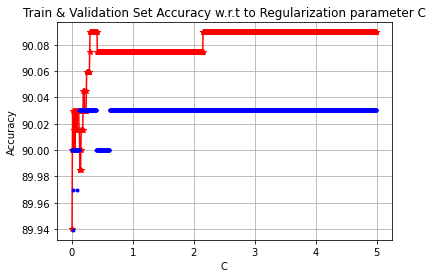

In [ ]:
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Train & Validation Set Accuracy w.r.t to Regularization parameter C')
plt.grid(True)
plt.plot(res_df['C'], res_df['Train_acc'] , 'r*-') # plotting t, a separately 
plt.plot(res_df['C'], res_df['Val_acc'] , 'b.') # plotting t, a separately

In [ ]:
#Variation of C wrt to the Solver

C=0.001
iterations = 1000

# There are 5 solvers. For each, we need to see their accuracy on train & validation sets plus their build time.
# Additionaly, first two columns are Sl & C. Hence, a total of (5*3) + 2 = 17 columns reqd.
results = np.zeros((iterations, 17))
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

for i in range(0,iterations):    
    model_params = {'C':C,'random_state':1}
    results[i][0:2] = i+1, C
    
    j = 2 #internal counter for iterating over each of the solver's results values
    for solver in solver_list:
        model_params.update({'solver': solver})
        acc_val,time_val = evaluate(X_train, y_train, X_test, y_test, model_params)
        acc_tr,time_tr = evaluate(X_train, y_train, X_train, y_train, model_params)
        results[i][j:j+3] = acc_tr, acc_val, time_val
        j+=3
        
    C+=0.005

columns = ['Sl','C']
for solver in solver_list:
    columns.append('Train_acc_'+solver)
    columns.append('Val_acc_'+solver)
    columns.append('Build_time_'+solver)

res_df_solver_C = pd.DataFrame( data=results[0:,0:], 
                                  index=results[0:,0],
                                  columns=columns)
res_df_solver_C['Sl'] = res_df_solver_C['Sl'].astype(np.uint16)
res_df_solver_C.head()